In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sleep=pd.read_csv('/content/sleepDay_merged.csv')
sleep

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [10]:
sleep['NotSleepTime']=sleep['TotalTimeInBed']-sleep['TotalMinutesAsleep']
sleep['Id']=sleep['Id'].astype(str)

In [11]:
sleep['Id'].unique()

array(['1503960366', '1644430081', '1844505072', '1927972279',
       '2026352035', '2320127002', '2347167796', '3977333714',
       '4020332650', '4319703577', '4388161847', '4445114986',
       '4558609924', '4702921684', '5553957443', '5577150313',
       '6117666160', '6775888955', '6962181067', '7007744171',
       '7086361926', '8053475328', '8378563200', '8792009665'],
      dtype=object)

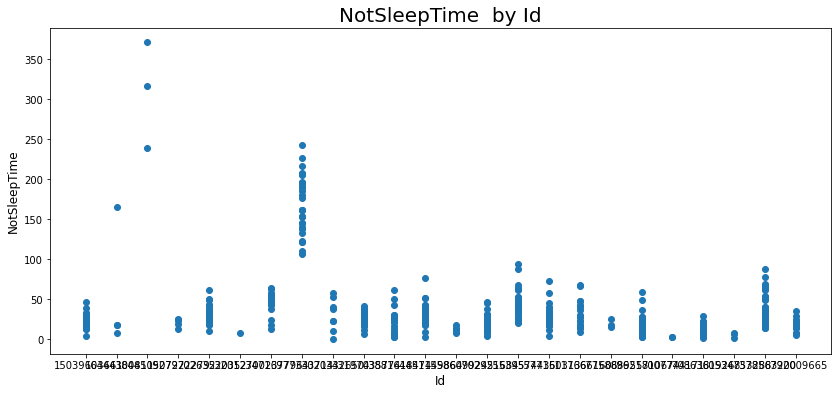

In [12]:
fig,ax = plt.subplots(figsize=(14,6))
ax.set_title('NotSleepTime  by Id',fontsize=20)
ax.set_ylabel('NotSleepTime',fontsize=12)
ax.set_xlabel('Id',fontsize=12)
ax.scatter(sleep['Id'],sleep['NotSleepTime'])

In [13]:
sleep2=sleep.groupby('Id',as_index=False)['NotSleepTime'].max()
sleep2

,Id,NotSleepTime
0,1503960366,46
1,1644430081,165
2,1844505072,371
3,1927972279,25
4,2026352035,61
5,2320127002,8
6,2347167796,64
7,3977333714,243
8,4020332650,58
9,4319703577,41


In [14]:
act=pd.read_csv('/content/dailyActivity_merged1.csv')
act

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [15]:
act['Id']=act['Id'].astype(str)

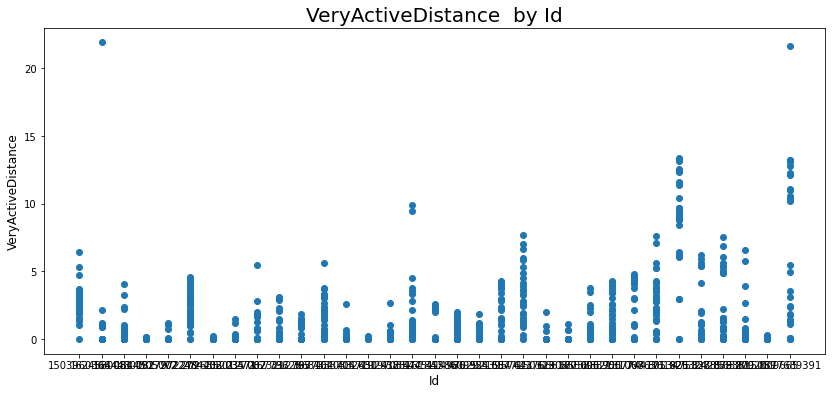

In [16]:


fig,ax = plt.subplots(figsize=(14,6))
ax.set_title('VeryActiveDistance  by Id',fontsize=20)
ax.set_ylabel('VeryActiveDistance',fontsize=12)
ax.set_xlabel('Id',fontsize=12)
ax.scatter(act['Id'],act['VeryActiveDistance'])



In [17]:
act2=act.groupby('Id',as_index=False)['VeryActiveDistance'].max()
act2

,Id,VeryActiveDistance
0,1503960366,6.40
1,1624580081,21.92
2,1644430081,4.10
3,1844505072,0.14
4,1927972279,1.16
5,2022484408,4.55
6,2026352035,0.19
7,2320127002,1.49
8,2347167796,5.45
9,2873212765,3.11


In [18]:
act3=act2.merge(sleep2,on='Id',how='left')
act3

,Id,VeryActiveDistance,NotSleepTime
0,1503960366,6.40,46.0
1,1624580081,21.92,NaN
2,1644430081,4.10,165.0
3,1844505072,0.14,371.0
4,1927972279,1.16,25.0
5,2022484408,4.55,NaN
6,2026352035,0.19,61.0
7,2320127002,1.49,8.0
8,2347167796,5.45,64.0
9,2873212765,3.11,NaN


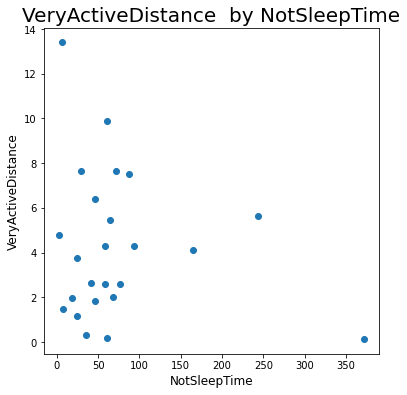

In [19]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_title('VeryActiveDistance  by NotSleepTime',fontsize=20)
ax.set_ylabel('VeryActiveDistance',fontsize=12)
ax.set_xlabel('NotSleepTime',fontsize=12)
ax.scatter(act3['NotSleepTime'],act3['VeryActiveDistance'])

In [20]:


weight=pd.read_csv('/content/weightLogInfo_merged.csv')
weight



,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000


In [21]:
weight['Id']=weight['Id'].astype(str)

In [22]:
weight2=weight[['Id','BMI']]
weight2=weight2.groupby('Id',as_index=False).max()
weight2

,Id,BMI
0,1503960366,22.650000
1,1927972279,47.540001
2,2873212765,21.690001
3,4319703577,27.450001
4,4558609924,27.459999
5,5577150313,28.000000
6,6962181067,24.389999
7,8877689391,25.680000


In [23]:
act4=act3.merge(weight2,on='Id',how='left')
act4

,Id,VeryActiveDistance,NotSleepTime,BMI
0,1503960366,6.40,46.0,22.650000
1,1624580081,21.92,NaN,NaN
2,1644430081,4.10,165.0,NaN
3,1844505072,0.14,371.0,NaN
4,1927972279,1.16,25.0,47.540001
5,2022484408,4.55,NaN,NaN
6,2026352035,0.19,61.0,NaN
7,2320127002,1.49,8.0,NaN
8,2347167796,5.45,64.0,NaN
9,2873212765,3.11,NaN,21.690001


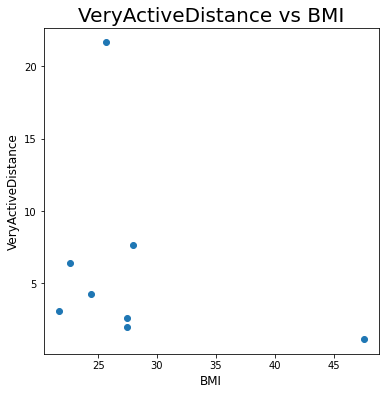

In [24]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_title('VeryActiveDistance vs BMI',fontsize=20)
ax.set_ylabel('VeryActiveDistance',fontsize=12)
ax.set_xlabel('BMI',fontsize=12)
ax.scatter(act4['BMI'],act4['VeryActiveDistance'])